In [1]:
pip install https://github.com/fastai/fastai1/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 132.1 MB 146 kB/s
     |████████████████████████████████| 332 kB 4.8 MB/s 
  Created wheel for fastai: filename=fastai-1.0.64.dev0-py3-none-any.whl size=241906 sha256=af00816f3075534a961cd21c770ca2c6d36a6761a3041d8a1064a7c5489aa194
  Stored in directory: /tmp/pip-ephem-wheel-cache-ra2j9qn7/wheels/a9/1d/67/48a06642ed4ac8db07b364643d67755fc669efb970b683daa9
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=401adb9615055ce9810b5300f1af2082be69b90b776d43a63d07a381f03aabba
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built fastai nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [2]:
# ensure that any edits to libraries you make are reloaded here automatically
%reload_ext autoreload
%autoreload 2

# ensure that any charts or images displayed are shown in this notebook
%matplotlib inline

In [3]:
from google.colab import files
import os
# fastai V1 library which sits on top of Pytorch 1.0
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils import *
# to avoid warning of PyTorch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
import numpy as np
np.random.seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/ML-Lab/Data/Original/Corpus-CorrectData'

/content/drive/MyDrive/ML-Lab/Data/Original/Corpus-CorrectData


In [6]:
# transform the data to achive data augmentation, we will see more about this later
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1, 
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [7]:
path = '/content/drive/MyDrive/ML-Lab/Data/Original/Corpus-CorrectData'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4, padding_mode='reflection', bs=64).normalize(imagenet_stats)


/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if 

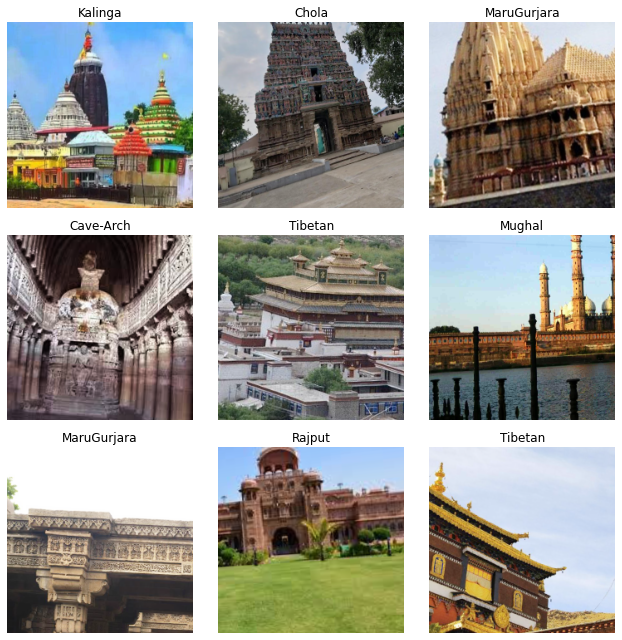

In [8]:
data.show_batch(rows=3, figsize=(9, 9))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cave-Arch',
  'Chola',
  'Hoysala',
  'Kalinga',
  'Kerala',
  'MaruGurjara',
  'Mughal',
  'Rajput',
  'Tibetan'],
 9,
 1432,
 358)

In [10]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

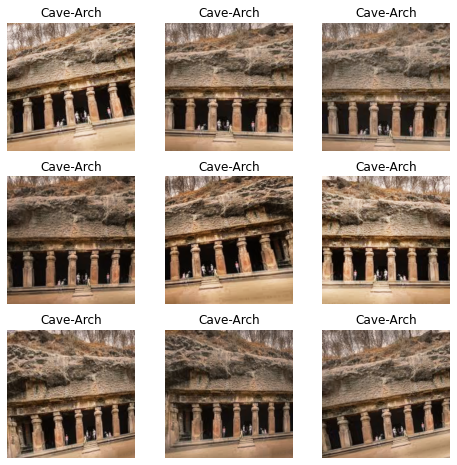

In [11]:
plot_multi(_plot, 3, 3, figsize=(8,8))

In [12]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[accuracy, error_rate, Precision(), Recall()], callback_fns=[CSVLogger])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [14]:
learn.model[1][3].p=0.25
learn.model[1][7].p=0.25

In [15]:
# We will train for 6 epochs (6 cycles through all our data)
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,time
0,2.137668,1.104617,0.617318,0.382682,0.646172,0.617705,02:27
1,1.292338,0.579800,0.826816,0.173184,0.832528,0.831454,00:53
2,0.883625,0.510376,0.818436,0.181564,0.819800,0.819700,00:52
3,0.668874,0.477681,0.846369,0.153631,0.847898,0.844935,00:53
4,0.507123,0.434725,0.843575,0.156425,0.844403,0.842821,00:52
5,0.419548,0.424010,0.846369,0.153631,0.846320,0.846595,00:54


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [16]:
learn.save('stage-1-vgg16')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
interp.most_confused(min_val=3)

[('Chola', 'Kalinga', 5),
 ('Mughal', 'Rajput', 4),
 ('Cave-Arch', 'Hoysala', 3),
 ('Rajput', 'Chola', 3),
 ('Rajput', 'Mughal', 3),
 ('Tibetan', 'Chola', 3),
 ('Tibetan', 'Kerala', 3)]

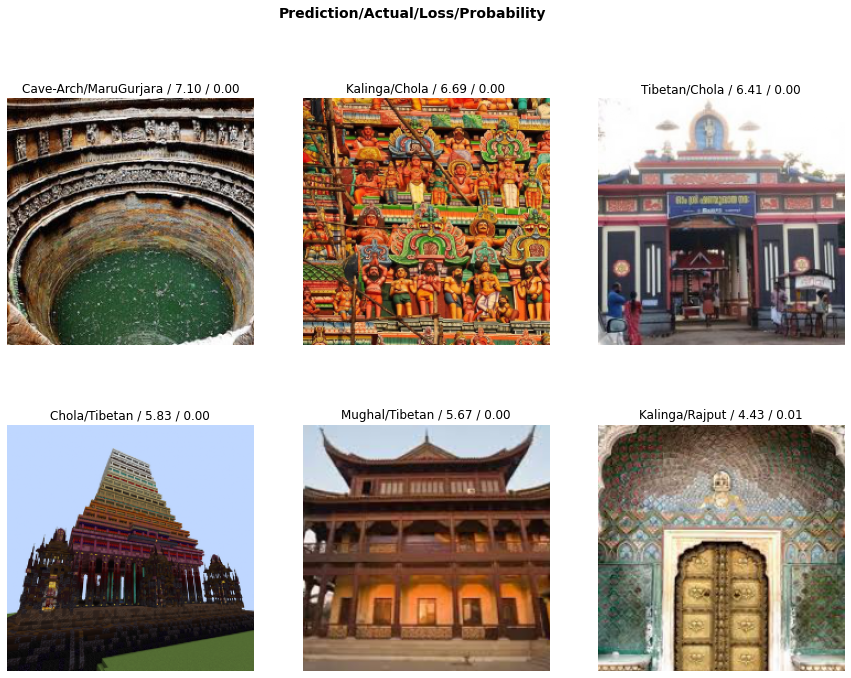

In [19]:
interp.plot_top_losses(6, figsize=(15,11))

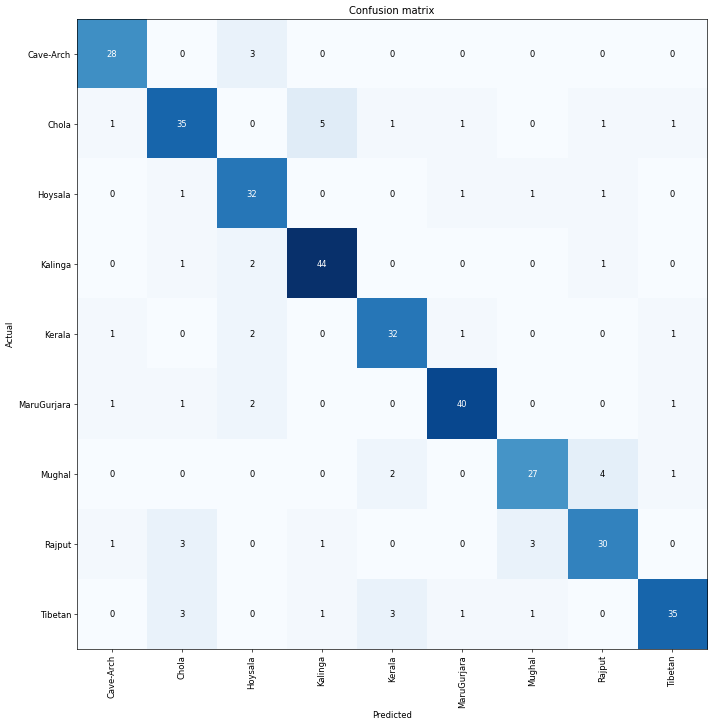

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
learn.unfreeze()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


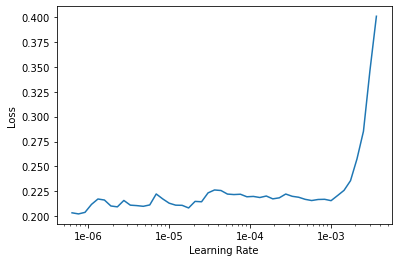

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,time
0,0.221502,0.423368,0.863128,0.136872,0.866515,0.863204,00:59
1,0.239898,0.637949,0.840782,0.159218,0.853346,0.839298,00:58
2,0.210285,0.496985,0.868715,0.131285,0.868270,0.871844,00:58
3,0.171210,0.531948,0.863128,0.136872,0.869969,0.860927,00:58
4,0.130312,0.387891,0.879888,0.120112,0.878644,0.879272,00:56
5,0.098030,0.353229,0.885475,0.114525,0.884531,0.885507,00:56


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [24]:
learn.save('stage-2-vgg16')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [26]:
interp.most_confused(min_val=3)

[('Chola', 'Kalinga', 4),
 ('Mughal', 'Kerala', 4),
 ('Chola', 'Hoysala', 3),
 ('Kerala', 'Cave-Arch', 3),
 ('MaruGurjara', 'Hoysala', 3),
 ('Tibetan', 'Chola', 3)]

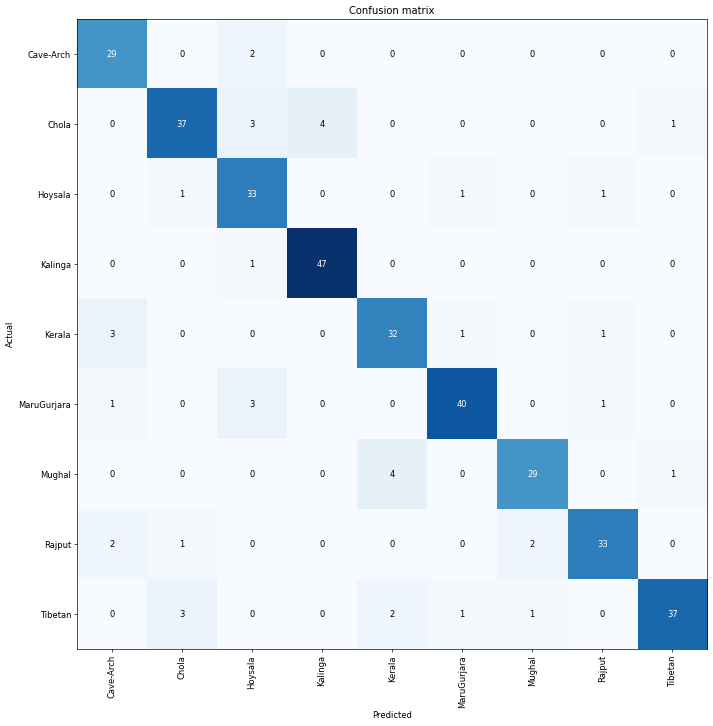

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

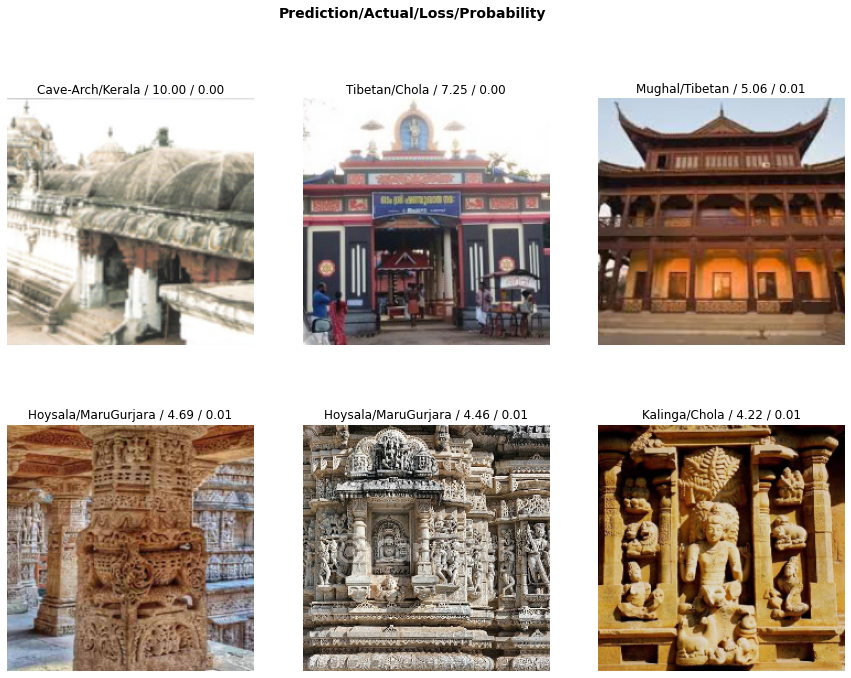

In [28]:
interp.plot_top_losses(6, figsize=(15,11))

In [29]:
learn.show_results(rows=5)

Output hidden; open in https://colab.research.google.com to view.